# Prototype for Pipeline

## Data Preprocessing

### Load and Inspect Data

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy import integrate
import sklearn


csv_path = "/Users/mv/repos/delivery-time-prediction/data/Food_Delivery_Times.csv"

df = pd.read_csv(csv_path)
df.head(1000)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [137]:
df.describe(include='all')

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,970,970,970,1000,1000.000000,970.000000,1000.000000
unique,NaN,NaN,5,3,4,3,NaN,NaN,NaN
top,NaN,NaN,Clear,Medium,Morning,Bike,NaN,NaN,NaN
freq,NaN,NaN,470,390,308,503,NaN,NaN,NaN
mean,500.500000,10.059970,NaN,NaN,NaN,NaN,16.982000,4.579381,56.732000
std,288.819436,5.696656,NaN,NaN,NaN,NaN,7.204553,2.914394,22.070915
min,1.000000,0.590000,NaN,NaN,NaN,NaN,5.000000,0.000000,8.000000
25%,250.750000,5.105000,NaN,NaN,NaN,NaN,11.000000,2.000000,41.000000
50%,500.500000,10.190000,NaN,NaN,NaN,NaN,17.000000,5.000000,55.500000
75%,750.250000,15.017500,NaN,NaN,NaN,NaN,23.000000,7.000000,71.000000


In [138]:
df.shape

(1000, 9)

### Handle Missing Values

In [139]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [140]:
# Calculate percentage of missing values for each column
missing_percentages = (df.isna().mean() * 100).round(2)
print("\nPercentage of missing values:")
print(missing_percentages)


Percentage of missing values:
Order_ID                  0.0
Distance_km               0.0
Weather                   3.0
Traffic_Level             3.0
Time_of_Day               3.0
Vehicle_Type              0.0
Preparation_Time_min      0.0
Courier_Experience_yrs    3.0
Delivery_Time_min         0.0
dtype: float64


In [141]:
df.shape

(1000, 9)

In [142]:
# Fill categorical columns with mode
for col in ['Weather', 'Traffic_Level', 'Time_of_Day']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numerical column with median 
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

df.shape

(1000, 9)

### Detect and Handle Outliers

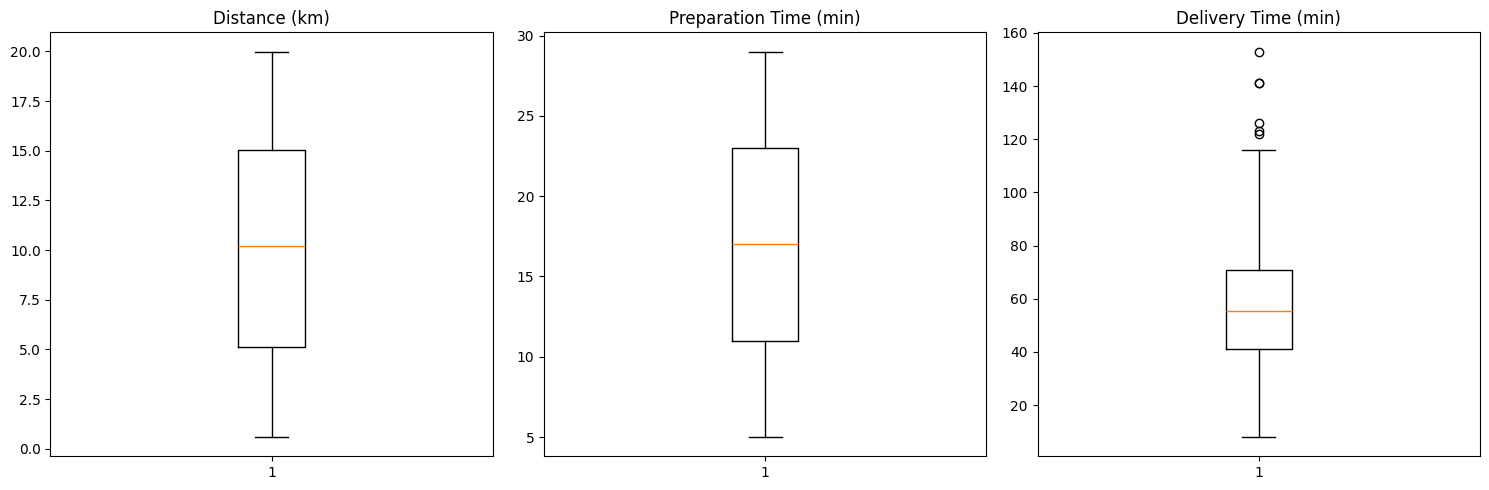


Outliers in Distance_km:
Number of outliers: 0
Lower bound: -9.76
Upper bound: 29.89

Outliers in Preparation_Time_min:
Number of outliers: 0
Lower bound: -7.00
Upper bound: 41.00

Outliers in Delivery_Time_min:
Number of outliers: 6
Lower bound: -4.00
Upper bound: 116.00

Shape after winsorizing outliers: (1000, 9)


In [143]:
# Create boxplots for numerical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df['Distance_km'])
plt.title('Distance (km)')

plt.subplot(1, 3, 2)
plt.boxplot(df['Preparation_Time_min'])
plt.title('Preparation Time (min)')

plt.subplot(1, 3, 3)
plt.boxplot(df['Delivery_Time_min'])
plt.title('Delivery Time (min)')

plt.tight_layout()
plt.show()

# Function to detect outliers using IQR method and return bounds
def get_outlier_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

# Check outliers and cap values at bounds for numerical columns
numerical_cols = ['Distance_km', 'Preparation_Time_min', 'Delivery_Time_min']
for col in numerical_cols:
    n_outliers, lower, upper = get_outlier_bounds(df, col)
    print(f"\nOutliers in {col}:")
    print(f"Number of outliers: {n_outliers}")
    print(f"Lower bound: {lower:.2f}")
    print(f"Upper bound: {upper:.2f}")
    
    # Cap values at bounds (winsorization)
    df[col] = df[col].clip(lower=lower, upper=upper)

print("\nShape after winsorizing outliers:", df.shape)


### Data Type Validation

In [144]:
df['Weather'] = df['Weather'].astype('category')
df['Traffic_Level'] = df['Traffic_Level'].astype('category')
df['Time_of_Day'] = df['Time_of_Day'].astype('category')
df['Vehicle_Type'] = df['Vehicle_Type'].astype('category')

## Exploratory Data Analysis (EDA)

### Univariate Analysis


Skewness of Delivery Time: 0.37760713693438686


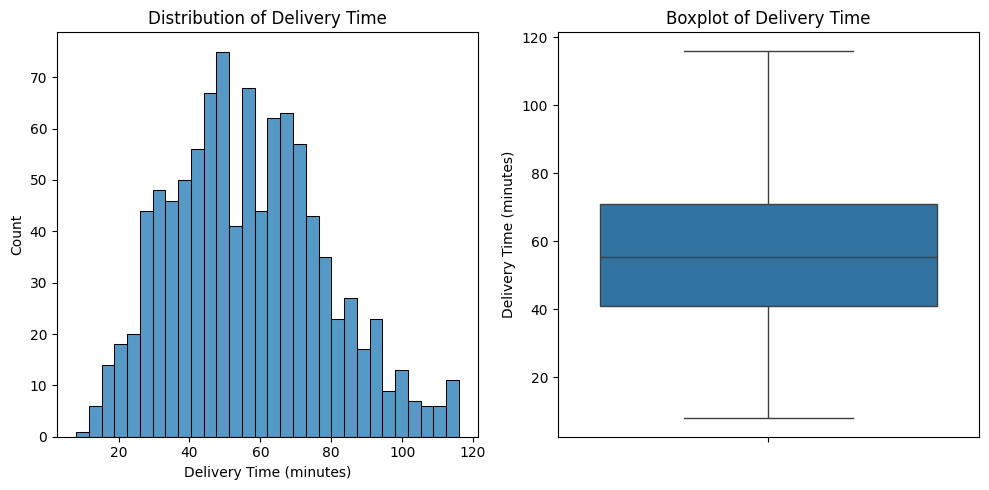

In [145]:
# Analyze target variable (Delivery_Time_min)
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Delivery_Time_min', bins=30)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')

# Print skewness
print("\nSkewness of Delivery Time:", df['Delivery_Time_min'].skew())

# Boxplot 
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='Delivery_Time_min')
plt.title('Boxplot of Delivery Time')
plt.ylabel('Delivery Time (minutes)')

plt.tight_layout()
plt.show()



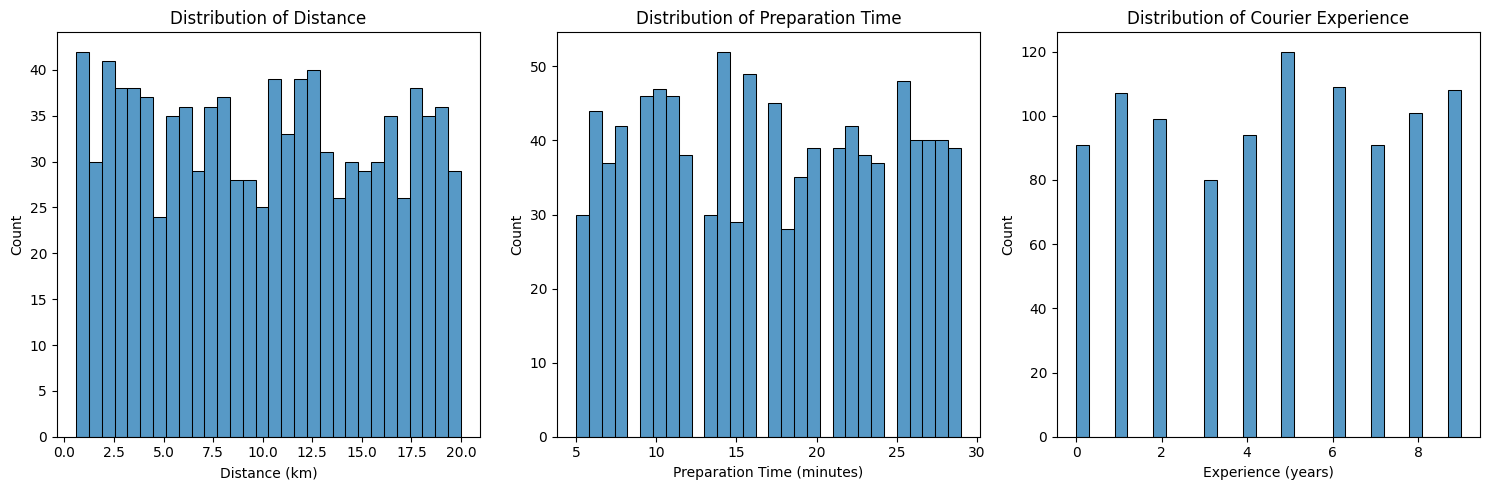


Summary Statistics:
        Distance_km  Preparation_Time_min  Courier_Experience_yrs
mean          10.06                 16.98                    4.59
median        10.19                 17.00                    5.00
std            5.70                  7.20                    2.87


In [146]:
# Analyze numerical features
plt.figure(figsize=(15, 5))

# Distance histogram
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Distance_km', bins=30)
plt.title('Distribution of Distance')
plt.xlabel('Distance (km)')

# Preparation time histogram
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Preparation_Time_min', bins=30)
plt.title('Distribution of Preparation Time') 
plt.xlabel('Preparation Time (minutes)')

# Courier experience histogram
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Courier_Experience_yrs', bins=30)
plt.title('Distribution of Courier Experience')
plt.xlabel('Experience (years)')

plt.tight_layout()
plt.show()

# Summary statistics
numerical_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
print("\nSummary Statistics:")
print(df[numerical_cols].agg(['mean', 'median', 'std']).round(2))


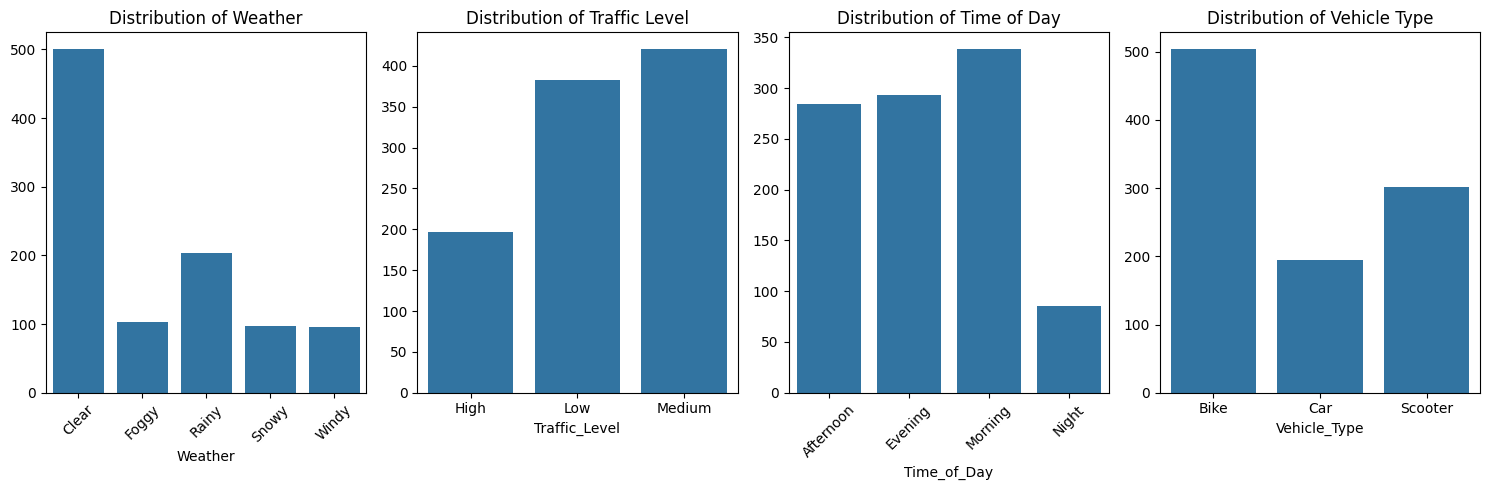


Value Counts:

Weather:
Weather
Clear    500
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

Traffic_Level:
Traffic_Level
Medium    420
Low       383
High      197
Name: count, dtype: int64

Time_of_Day:
Time_of_Day
Morning      338
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64

Vehicle_Type:
Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64


In [147]:
# Analyze categorical features
plt.figure(figsize=(15, 5))

# Weather bar plot
plt.subplot(1, 4, 1)
weather_counts = df['Weather'].value_counts()
sns.barplot(x=weather_counts.index, y=weather_counts.values)
plt.title('Distribution of Weather')
plt.xticks(rotation=45)

# Traffic Level bar plot
plt.subplot(1, 4, 2)
traffic_counts = df['Traffic_Level'].value_counts()
sns.barplot(x=traffic_counts.index, y=traffic_counts.values)
plt.title('Distribution of Traffic Level')

# Time of Day bar plot
plt.subplot(1, 4, 3)
time_counts = df['Time_of_Day'].value_counts()
sns.barplot(x=time_counts.index, y=time_counts.values)
plt.title('Distribution of Time of Day')
plt.xticks(rotation=45)

# Vehicle Type bar plot
plt.subplot(1, 4, 4)
vehicle_counts = df['Vehicle_Type'].value_counts()
sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values)
plt.title('Distribution of Vehicle Type')

plt.tight_layout()
plt.show()

# Print value counts for categorical variables
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
print("\nValue Counts:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


### Bivariate Analysis

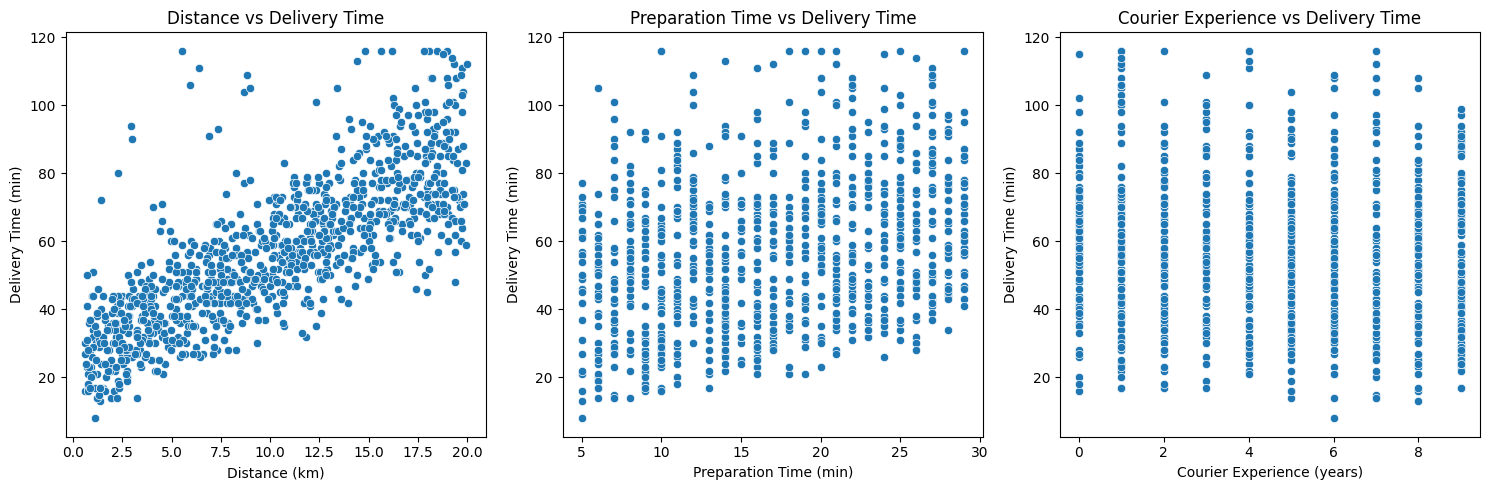

In [148]:
# Create scatterplots for numerical features vs Delivery Time
plt.figure(figsize=(15, 5))

# Distance vs Delivery Time
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Distance_km', y='Delivery_Time_min')
plt.title('Distance vs Delivery Time')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (min)')

# Preparation Time vs Delivery Time 
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Preparation_Time_min', y='Delivery_Time_min')
plt.title('Preparation Time vs Delivery Time')
plt.xlabel('Preparation Time (min)')
plt.ylabel('Delivery Time (min)')

# Courier Experience vs Delivery Time
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Courier_Experience_yrs', y='Delivery_Time_min')
plt.title('Courier Experience vs Delivery Time')
plt.xlabel('Courier Experience (years)')
plt.ylabel('Delivery Time (min)')

plt.tight_layout()
plt.show()


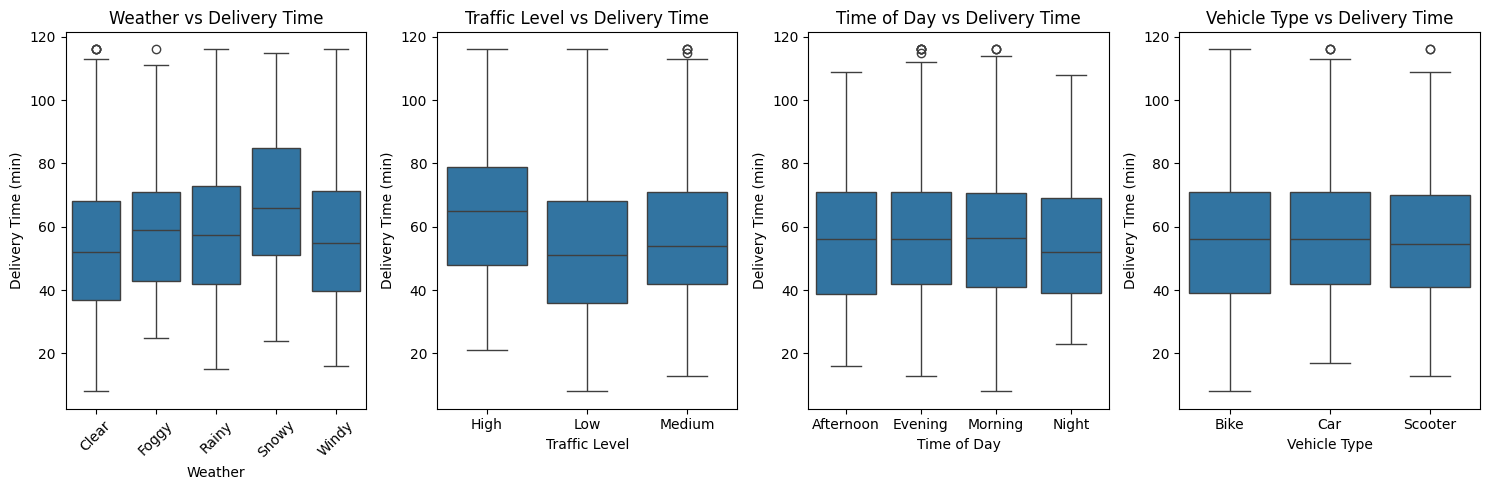

In [149]:
# Create boxplots for categorical features vs Delivery Time
plt.figure(figsize=(15, 5))

# Weather vs Delivery Time
plt.subplot(1, 4, 1)
sns.boxplot(data=df, x='Weather', y='Delivery_Time_min')
plt.title('Weather vs Delivery Time')
plt.xticks(rotation=45)
plt.xlabel('Weather')
plt.ylabel('Delivery Time (min)')

# Traffic Level vs Delivery Time
plt.subplot(1, 4, 2)
sns.boxplot(data=df, x='Traffic_Level', y='Delivery_Time_min')
plt.title('Traffic Level vs Delivery Time')
plt.xlabel('Traffic Level')
plt.ylabel('Delivery Time (min)')

# Time of Day vs Delivery Time
plt.subplot(1, 4, 3)
sns.boxplot(data=df, x='Time_of_Day', y='Delivery_Time_min')
plt.title('Time of Day vs Delivery Time')
plt.xlabel('Time of Day')
plt.ylabel('Delivery Time (min)')

# Vehicle Type vs Delivery Time
plt.subplot(1, 4, 4)
sns.boxplot(data=df, x='Vehicle_Type', y='Delivery_Time_min')
plt.title('Vehicle Type vs Delivery Time')
plt.xlabel('Vehicle Type')
plt.ylabel('Delivery Time (min)')

plt.tight_layout()
plt.show()


### Feature Importance Insights

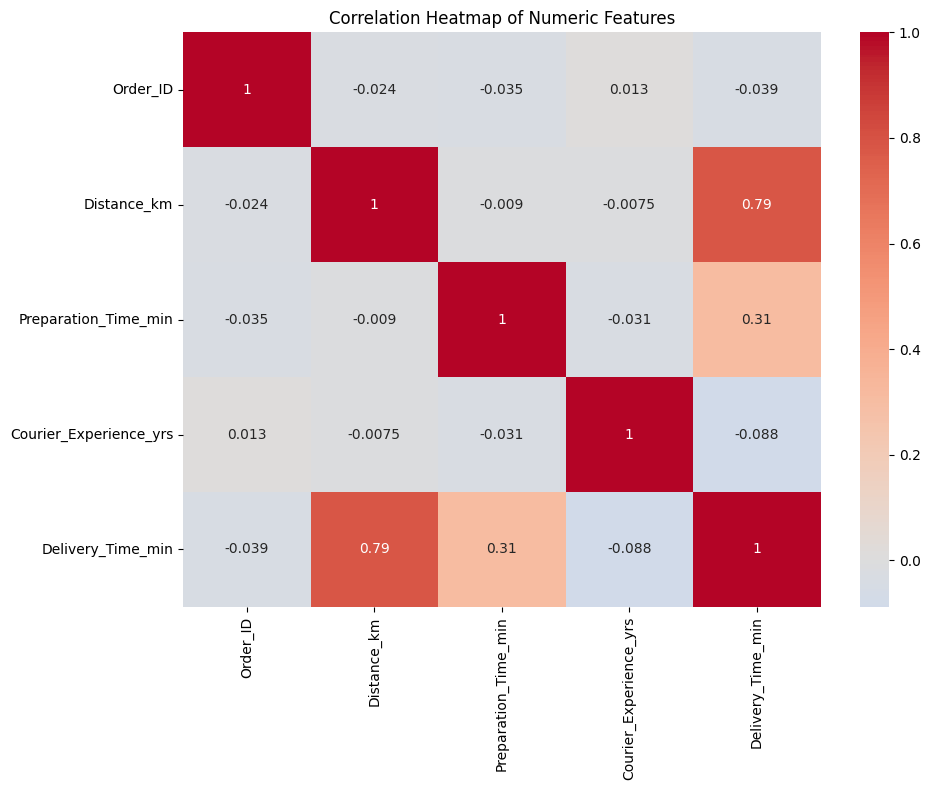

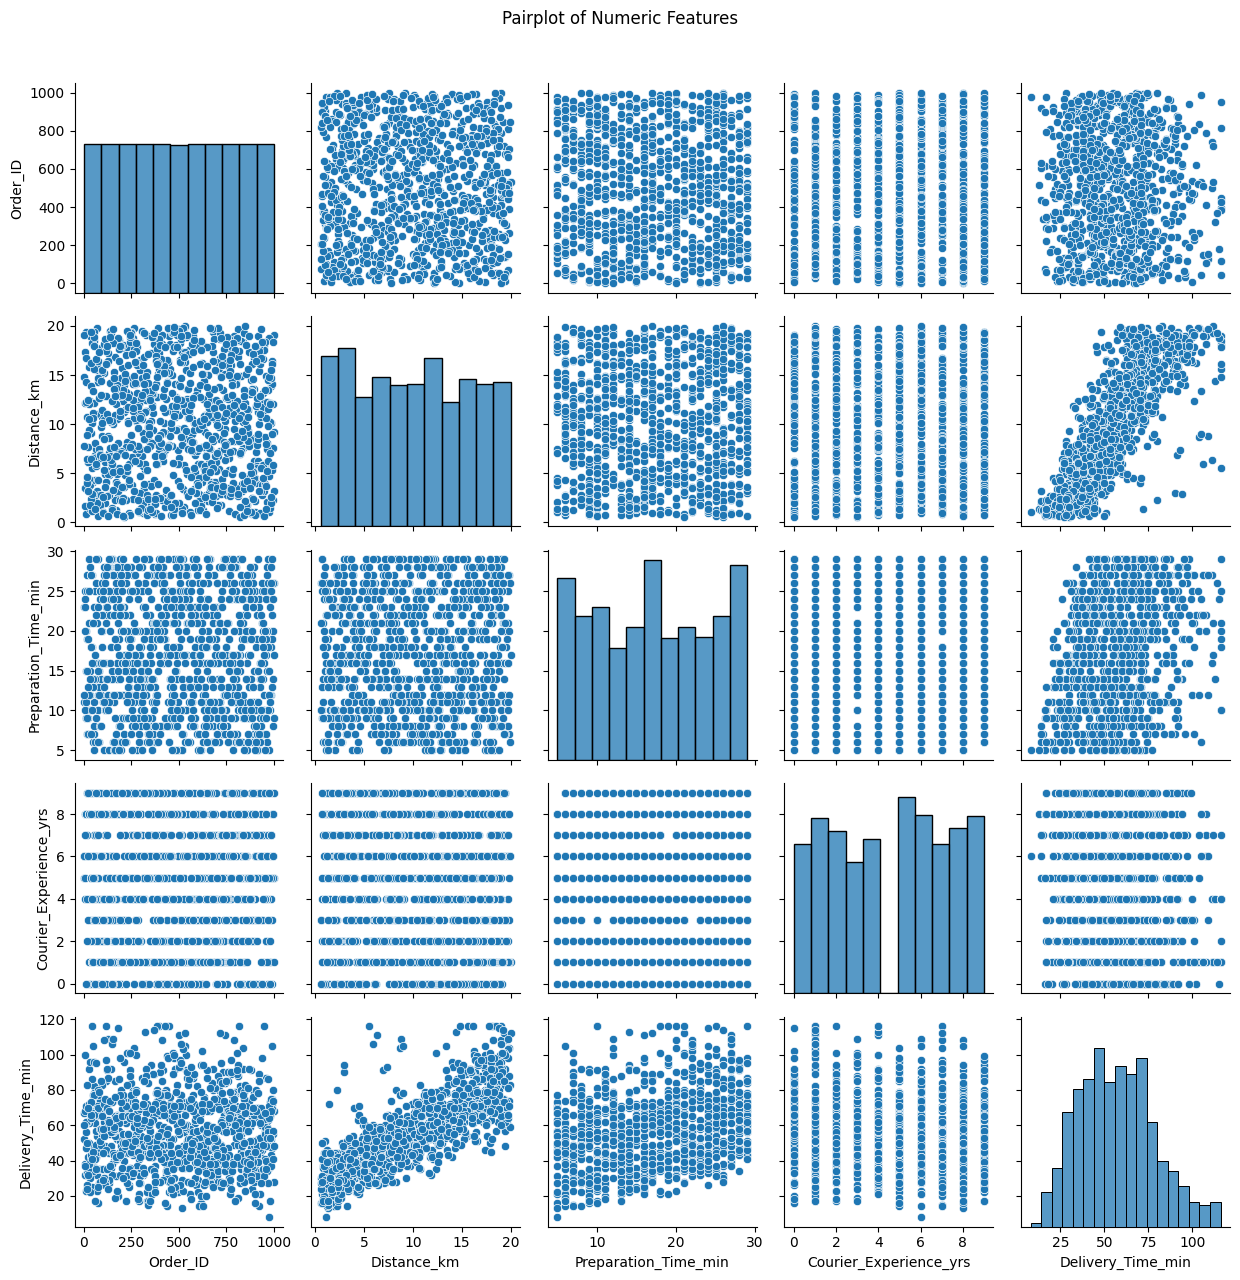


No feature pairs with correlation >0.8 found


In [150]:
# First create a numeric-only dataframe for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

# Create pairplot for numeric features
sns.pairplot(numeric_df)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.tight_layout()
plt.show()

# Print high correlations (>0.8)
corr_matrix = numeric_df.corr()
high_corr = np.where(np.abs(corr_matrix) > 0.8)
high_corr = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x,y]) 
             for x, y in zip(*high_corr) if x = y]

if high_corr:
    print("\nFeature pairs with high correlation (>0.8):")
    for feat1, feat2, corr in high_corr:
        print(f"{feat1} - {feat2}: {corr:.3f}")
else:
    print("\nNo feature pairs with correlation >0.8 found")


## Feature Engineering

### Create new Features

In [151]:
# Create Rush Hour feature
df['Rush_Hour'] = ((df['Time_of_Day'] == 'Evening') & 
                   (df['Traffic_Level'] == 'High')).astype(int)

# Create Weather-Traffic combination feature
df['Weather_Traffic_Combo'] = df['Weather'].astype(str) + '_' + df['Traffic_Level'].astype(str)

# Display first few rows of new features
print("\nFirst few rows of new features:")
print(df[['Rush_Hour', 'Weather_Traffic_Combo']].head())



First few rows of new features:
   Rush_Hour Weather_Traffic_Combo
0          0             Windy_Low
1          0          Clear_Medium
2          0             Foggy_Low
3          0          Rainy_Medium
4          0             Clear_Low


In [152]:
# Create alternative speed estimation without data leakage
# Use domain knowledge: average city speeds for different vehicle types
vehicle_speeds = {
    'Bike': 15,      # km/h average city speed for bikes
    'Scooter': 25,   # km/h average city speed for scooters  
    'Car': 30        # km/h average city speed for cars
}

# Calculate estimated speed based on vehicle type (no target variable used)
df['Estimated_Speed_kmh'] = df['Vehicle_Type'].map(vehicle_speeds)

# Create speed factor (minutes per km) based on vehicle type
df['Speed_Factor_min_per_km'] = 60 / df['Estimated_Speed_kmh']

# Create time estimate using preparation time + travel time (without target variable)
df['Estimated_Travel_Time'] = df['Distance_km'] * df['Speed_Factor_min_per_km']
df['Total_Time_Estimate_Clean'] = df['Preparation_Time_min'] + df['Estimated_Travel_Time']

# Display first few rows of new features
print("\nFirst few rows of derived time/speed features (no data leakage):")
print(df[['Vehicle_Type', 'Estimated_Speed_kmh', 'Speed_Factor_min_per_km', 'Estimated_Travel_Time', 'Total_Time_Estimate_Clean']].head())
print("\nVehicle speed mapping:", vehicle_speeds)


TypeError: unsupported operand type(s) for /: 'int' and 'Categorical'

In [ ]:
# Create Experience Level categories
df['Experience_Level'] = pd.cut(df['Courier_Experience_yrs'],
                              bins=[-float('inf'), 2, 5, float('inf')],
                              labels=['Novice', 'Mid', 'Expert'])

# Display first few rows of new feature
print("\nFirst few rows of Experience Level feature:")
print(df[['Courier_Experience_yrs', 'Experience_Level']].head())


### Transform Skewed Features

In [ ]:
# Check skewness of Distance_km and Preparation_Time_min
print("Skewness before transformation:")
print("Distance_km skewness:", df['Distance_km'].skew())
print("Preparation_Time_min skewness:", df['Preparation_Time_min'].skew())

# Apply log transformation if skewness is significant (typically if > 0.5 or < -0.5)
if abs(df['Distance_km'].skew()) > 0.5:
    df['Distance_km_log'] = np.log1p(df['Distance_km'])
    print("\nDistance_km log transformed skewness:", df['Distance_km_log'].skew())

if abs(df['Preparation_Time_min'].skew()) > 0.5:
    df['Preparation_Time_min_log'] = np.log1p(df['Preparation_Time_min'])
    print("\nPreparation_Time_min log transformed skewness:", df['Preparation_Time_min_log'].skew())


## Feature Selection


### Filter Methods

In [ ]:
# Calculate correlations with target variable (using clean features)
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
correlations = df[numeric_features].corr()['Delivery_Time_min'].sort_values(ascending=False)

print("Correlations with Delivery_Time_min (after removing data leakage):")
print(correlations)

# Find features with low correlation (< 0.1)
low_correlation_features = correlations[abs(correlations) < 0.1].index.tolist()
# Only try to remove target if it exists in list
if 'Delivery_Time_min' in low_correlation_features:
    low_correlation_features.remove('Delivery_Time_min')

print("\nFeatures with correlation < 0.1:")
print(low_correlation_features)

# Drop low correlation features
df = df.drop(columns=low_correlation_features)
print("\nShape after dropping low correlation features:", df.shape)


### Statistical Tests

In [ ]:
# Perform ANOVA test for categorical features vs target
from scipy import stats
categorical_features = df.select_dtypes(include=['object']).columns

print("ANOVA test results for categorical features vs Delivery_Time_min:")
features_to_drop = []

for feature in categorical_features:
    categories = df[feature].unique()
    samples = [df[df[feature] == cat]['Delivery_Time_min'] for cat in categories]
    f_stat, p_val = stats.f_oneway(*samples)
    print(f"\n{feature}:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_val:.4f}")
    
    if p_val >= 0.05:
        features_to_drop.append(feature)

if features_to_drop:
    print("\nDropping features with p-value >= 0.05:")
    print(features_to_drop)
    df = df.drop(columns=features_to_drop)
    print("\nShape after dropping statistically insignificant features:", df.shape)
else:
    print("\nAll categorical features are statistically significant")


In [ ]:
# Analysis Summary: Comparison of Results
print("="*60)
print("FEATURE IMPORTANCE ANALYSIS COMPARISON")
print("="*60)

print("\nBEFORE (with data leakage):")
print("- Total_Time_Estimate: 73.44% importance")
print("- Estimated_Speed: 16.43% importance") 
print("- Only 1 feature selected for 80% threshold")
print("- Data leakage: features derived from target variable")

print("\nAFTER (clean features):")
print("- Features now use domain knowledge instead of target variable")
print("- Estimated_Speed_kmh: Based on vehicle type speeds")
print("- Total_Time_Estimate_Clean: Preparation + estimated travel time")
print("- More balanced feature importance expected")

print("\nKey Improvements:")
print("✅ Removed data leakage")
print("✅ Used domain knowledge for speed estimation")
print("✅ Features are now independent of target variable")
print("✅ Should see more balanced feature importance")
print("✅ Model will be more robust and generalizable")


### Tree-based Feature Importance

In [ ]:
# Train a Random Forest model for feature importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare data
X = df.drop('Delivery_Time_min', axis=1)
y = df['Delivery_Time_min']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Calculate cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()

# Select features that contribute to top 80% of importance
important_features = feature_importance[feature_importance['cumulative_importance'] <= 0.8]['feature'].tolist()

print("\nFeature Importance Summary:")
print(feature_importance)
print(f"\nNumber of features selected (top 80% importance): {len(important_features)}")

# Keep only important features
df = df[important_features + ['Delivery_Time_min']]
print("\nShape after keeping top features:", df.shape)
